In [37]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier


# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [38]:
X = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_features.csv', index_col='respondent_id')
y = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/training_set_labels.csv', index_col='respondent_id')
test_set = pd.read_csv('/Users/stephen/Flatiron/Phase3/project_3/Data/test_set_features.csv', index_col='respondent_id')

In [39]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [41]:
y = pd.Series(y['h1n1_vaccine'])

In [42]:
y.shape

(26707,)

In [43]:
y.value_counts(normalize=True)

0   0.79
1   0.21
Name: h1n1_vaccine, dtype: float64

In [44]:
y

respondent_id
0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [45]:
X.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [46]:
X.shape

(26707, 35)

In [47]:
X.drop(columns=['hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation'], inplace=True)

In [48]:
X.shape

(26707, 31)

In [49]:
X.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,24547.00,...,25903.00,14433.00,26316.00,26319.00,26312.00,26245.00,26193.00,26170.00,26458.00,26458.00
mean,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,0.22,...,0.11,0.88,3.85,2.34,2.36,4.03,2.72,2.12,0.89,0.53
std,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,0.41,...,0.32,0.33,1.01,1.29,1.36,1.09,1.39,1.33,0.75,0.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,3.00,1.00,1.00,4.00,2.00,1.00,0.00,0.00
50%,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,1.00,4.00,2.00,2.00,4.00,2.00,2.00,1.00,0.00
75%,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,...,0.00,1.00,5.00,4.00,4.00,5.00,4.00,4.00,1.00,1.00
max,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,3.00,3.00


In [50]:
X.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [51]:
X.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.00,26591.00,26636.00,26499.00,26688.00,26665.00,26620.00,26625.00,26579.00,24547.00,...,25903.00,14433.00,26316.00,26319.00,26312.00,26245.00,26193.00,26170.00,26458.00,26458.00
mean,1.62,1.26,0.05,0.73,0.07,0.83,0.36,0.34,0.68,0.22,...,0.11,0.88,3.85,2.34,2.36,4.03,2.72,2.12,0.89,0.53
std,0.91,0.62,0.22,0.45,0.25,0.38,0.48,0.47,0.47,0.41,...,0.32,0.33,1.01,1.29,1.36,1.09,1.39,1.33,0.75,0.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,3.00,1.00,1.00,4.00,2.00,1.00,0.00,0.00
50%,2.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,...,0.00,1.00,4.00,2.00,2.00,4.00,2.00,2.00,1.00,0.00
75%,2.00,2.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,...,0.00,1.00,5.00,4.00,4.00,5.00,4.00,4.00,1.00,1.00
max,3.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,5.00,5.00,5.00,5.00,5.00,5.00,3.00,3.00


Baseline Model

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:

num_cols = X.select_dtypes('number').columns

ord_cols = ['age_group', 'education',  'income_poverty', 'employment_status']

cat_cols = ['race', 'sex', 'marital_status', 'rent_or_own'] 


cat_cols

['race', 'sex', 'marital_status', 'rent_or_own']

In [68]:
# code taken from https://www.drivendata.co/blog/predict-flu-vaccine-data-benchmark/

# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, num_cols)
    ],
    remainder = "drop"
)


In [57]:
clf = Pipeline(steps=[('preprocessing', preprocessing), 
                    ('classifier', LogisticRegression(random_state=5, max_iter=10000, )])


In [58]:
output = cross_validate(clf, X_train, y_train, cv=3)
print(f"Average ROC-AUC: {output['test_score'].mean()} +/- {output['test_score'].std()}")

Average ROC-AUC: 0.8329005484877708 +/- 0.0038214734351914525


In [59]:
output

#plot_roc_curve(clf, X_train, y_train)

{'fit_time': array([0.23122931, 0.27484012, 0.22597909]),
 'score_time': array([0.02154875, 0.02512217, 0.02469897]),
 'test_score': array([0.82956418, 0.83825071, 0.83088676])}

In [60]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8364534970795268

In [61]:
clf.score(X_test, y_test)

0.8364534970795268

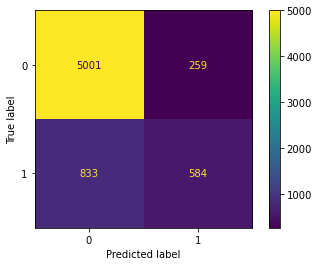

In [69]:

plot_confusion_matrix(clf, X_test, y_test)

In [62]:
initial_tree = DecisionTreeClassifier()


#fit to train

initial_tree.fit(X_train,y_train)

ValueError: could not convert string to float: '18 - 34 Years'

In [ ]:
#test feature importance

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), clf.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(clf)


#citation: tree lab